</h2>Understanding Time-Series Forecasting problems </h2>
<p>Forecasting can be of two types qualitative and qantitative. The first depends upon human expertise and
thus may be baised where as the later depends upon the data. Forecasting problems are all about predicting
the future based on the past and current value. According to my understanding Time-Series problems are 
basic regression problems which have one important feature which makes them different from regular ML
problems is the data points collected are collected over a period of time which means they have the
temporal essence
</p><br>
</h3>Few Important Concepts to Understand about Time-Series Data</h3>
<br>
<ul>=>Granularity - the depth of the data points collected (Imagine zooming in from months scale to weeks or days or then zooming out from months to quaters or years. The more granular the data the more the computation!)
<br>
Remember Granularity is more like a hyperparameter at times you may want to try to out the best scale for your
business problem</ul>

<ul>=> Frequency - the rate at which the new data point is added, could be mins, hours, days, weeks ...</ul>
<br>
<ul>=> Remember that Forecasting model keep on loosing accuracy as we try to predict further future points</ul>
<br>
<ul>=> A time Series data comprises of following features : 
    <ul>-> LEVEL: (This could be considered as the mean or base point for that data accross the timeline)</ul>
    <br>
    <ul>-> TREND: This could mean the pattern over time (the slope could be incremental, decremental, stationary)</ul>
    <br>
    <ul>-> Cyclicity: This means whether our data points repeats over perdiod of time. There could be two types of cyclicity one is seasonal which means it repeats over a fixed interval and one could be non-seasonal. Assume that Diwali is celebrated every year or any other festival, this would mean for a sales company one must assume a seasonal spike every year. Whereas assume something like covid comes up this isn't a regular case, this could cause drops in sale which could never be predicted. One more example
    can be Elections which happen one in every 5 years, sometimes they may increase sales sometimes decrease depending upon the polititcal situation over economy.</ul>
    <br>
    <ul>->Noise: If we remove the Trend, Level, Cyclicity from the input data whatever is left is considered noise</ul>
</ul>

<p> As explained above Time-Series data problems must have some relation with respect to time and are basically some regression based solutions hence the best way to evaluate the model is to use RSME and MAPE metrics</p>

<h2> Some concepts related one of the most reliable time-series model ARIMA </h2>
<br>
<ul> A.R -> stands for Auto Regession which means the model assumes the future step (t+1) depends upon
    current step (t) and past steps (t-1),(t-2)..(t-n). In short we check how the stationary time series is dependent on the past data   </ul><br>
<ul>I -> Integrated -> this means the dataset is made stationary by subtracting the lag (hyperparameter) </ul><br>
<ul>M.A -> Moving Average can be understood in a way assume you expected 100 units sale on day1 and you sold only 80 untis, so for the future step you will have the moving average from past to adjust your prediction. so say on day2 you are expecting 140 units sales so to adjust it with moving average you will say expected sales is 112. Now this cycle continues every future step will consider the moving avearge of past erros to adjust the prediction</ul><br>

<h3> Limitations of ARIMA </h3>
<ul> * Arimax is highly dependent on the truth in the data collected for training</ul><br>
<ul> * Arimax depends on three hyper-parameters (AR(p), I(q), MA(d)) which is depended on hit and trial</ul>

<h4> If the data is seasonal data it would make better sense to use SARIMA which is more robust to seasonality<h4>


## ARIMA MODEL HANDS-ON

In [3]:
#!pip install statsmodels
''' In this problem statement we will be solving a univariate problem where based on past records
for US we must predict the birth rate in coming years'''

In [4]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [5]:
female_birth_data=pd.read_csv("./data/daily-total-female-births-CA.csv") # This is a free datset

In [6]:
female_birth_data.head()

date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

In [9]:
# Loading the birth column as index
birth_data=pd.read_csv("./data/daily-total-female-births-CA.csv", index_col=[0], parse_dates=[0])
birth_data

births
date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]

In [10]:
birth_data.describe()

births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000

<AxesSubplot: xlabel='date'>

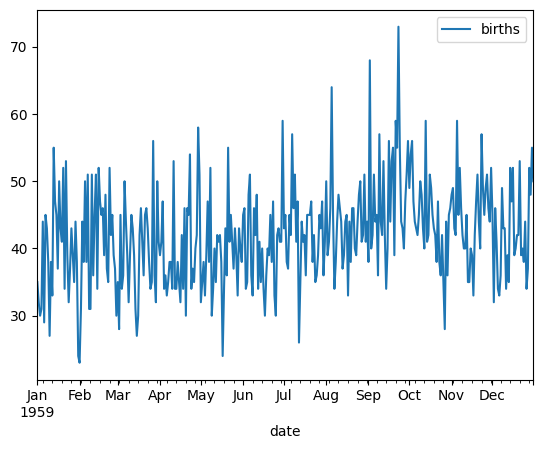

In [11]:
birth_data.plot() #almost a stationary series as the datapoints are almost around the overall average line

In [13]:
#Lets smoothen the data
moving_average_birth=birth_data.rolling(window=20).mean() 
# window: This is the number of observations used for calculating the statistic.
moving_average_birth

births
date              
1959-01-01     NaN
1959-01-02     NaN
1959-01-03     NaN
1959-01-04     NaN
1959-01-05     NaN
...            ...
1959-12-27   42.10
1959-12-28   42.25
1959-12-29   42.50
1959-12-30   43.10
1959-12-31   43.90

[365 rows x 1 columns]

<AxesSubplot: xlabel='date'>

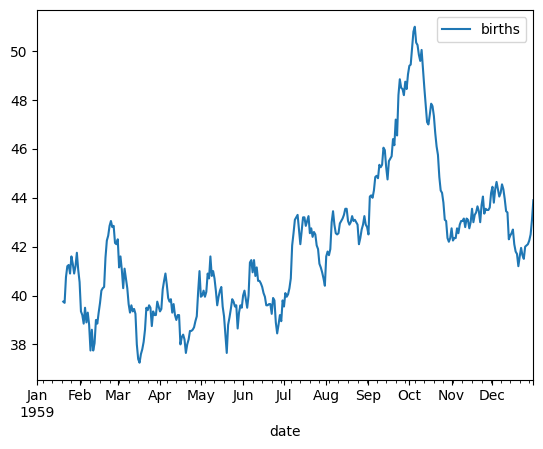

In [14]:
moving_average_birth.plot() # we can see that there is a peak in the month of october
#If the prediction is for companies related to pre-birth products the important month of sales could be around Jan-March
#Whereas if the prediction for companies related to medical aids needed during delivery the peak of sales is august-december
#Whereas if the prediction is for companies making products related to infant care the peak of sales is around October-March

In [15]:
sm.stats.durbin_watson(birth_data) # This helps us understand the correlatio which in our case is very less

array([0.04624491])

C:\Users\gaura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


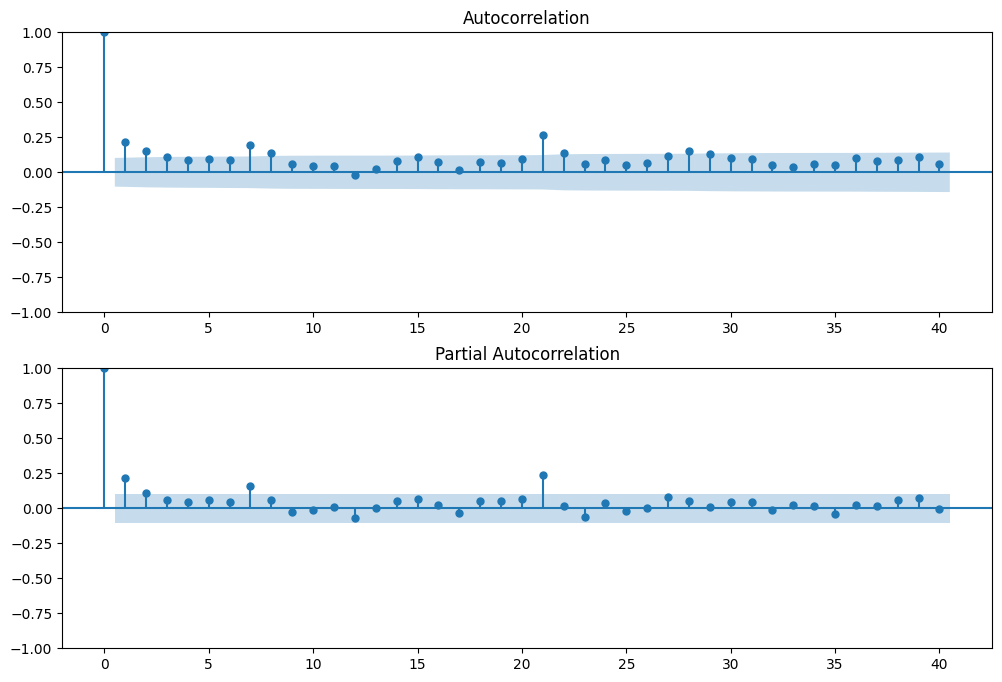

In [18]:
'''
ACF and PACF are the components which can help us decide the hyper-parameters for AR and MA
'''

# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(birth_data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(birth_data, lags=40, ax=ax2)

In [32]:
#Train-test-split
training_data=birth_data[0:320]
test_data=birth_data[320:]
print(len(test_data))

45


In [22]:
from statsmodels.tsa.arima.model import ARIMA
arima= ARIMA(training_data,order=(2,1,3))
model=arima.fit()

C:\Users\gaura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [23]:
model.aic

2167.8472399068664

In [34]:
pred= model.forecast(steps=45)
pred

1959-11-17    42.860639
1959-11-18    43.279106
1959-11-19    43.447916
1959-11-20    43.526927
1959-11-21    43.555955
1959-11-22    43.571614
1959-11-23    43.576066
1959-11-24    43.579509
1959-11-25    43.579920
1959-11-26    43.580825
1959-11-27    43.580710
1959-11-28    43.581006
1959-11-29    43.580895
1959-11-30    43.581011
1959-12-01    43.580948
1959-12-02    43.580998
1959-12-03    43.580967
1959-12-04    43.580990
1959-12-05    43.580974
1959-12-06    43.580985
1959-12-07    43.580978
1959-12-08    43.580983
1959-12-09    43.580979
1959-12-10    43.580982
1959-12-11    43.580980
1959-12-12    43.580981
1959-12-13    43.580981
1959-12-14    43.580981
1959-12-15    43.580981
1959-12-16    43.580981
1959-12-17    43.580981
1959-12-18    43.580981
1959-12-19    43.580981
1959-12-20    43.580981
1959-12-21    43.580981
1959-12-22    43.580981
1959-12-23    43.580981
1959-12-24    43.580981
1959-12-25    43.580981
1959-12-26    43.580981
1959-12-27    43.580981
1959-12-28    43

In [35]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_data,pred))

6.53664504586193